### Simple Kmeans와의 비교

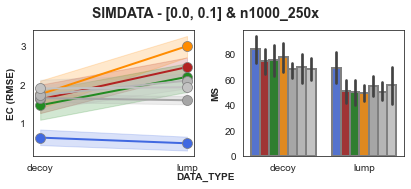

In [1]:
import numpy as np 
import pandas as pd
import os, glob
import matplotlib 
matplotlib.rcParams["font.family"] = 'arial'
import palettable
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

tabl = palettable.tableau.Tableau_20.mpl_colors
safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

colorlist = [i for i in safe7]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "saddlebrown", "chocolate",  "tan"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", "#7161ef", "#957fef",  "#b79ced"]
colorlist = ["royalblue", "firebrick", "forestgreen", "darkorange", Gr_10[6], Gr_10[5], Gr_10[4]]
sns.set_style("white")
#sns.set_palette("tab10")
sns.set_palette(sns.color_palette(colorlist))

def drawfigure (long_df, x, title, saveloc ):
    # Create a grouped bar graph
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (6, 2.5))
    fig.subplots_adjust ( wspace = 0.3, bottom = 0.15, top = 0.85, left = 0.1, right = 0.96)

    sns.lineplot(data = long_df, x = x, y = 'EC', hue = 'tool', 
                    linewidth = 2, marker = 'o',  markersize = 10, markeredgecolor = "gray", 
                    errorbar=('ci', 95), ax = ax[0])
    ax[0].set_xlabel( None )
    ax[0].set_ylabel( "EC (RMSE)", fontsize = 10, fontweight = "semibold" )
    ax[0].set_xticks ( sorted(list ( set(long_df[x])) ) ) 
    ax[0].legend_.remove()
    #ax[0].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc", "elbow", "sil", "gap"] )

    sns.barplot(data = long_df, x = x, y = 'MS', hue = 'tool', 
                    linewidth = 2, edgecolor='gray', 
                    dodge = True,
                    ax = ax[1])
    ax[1].set_xlabel( None )
    ax[1].set_ylabel( "MS", fontsize = 10, fontweight = "semibold" )
    ax[1].legend_.remove()
    #ax[1].legend ( title = None, labels = ["CLEMENT", "pyclone", "sciclone", "qc", "elbow", "sil", "gap"] )

    plt.suptitle( title , fontsize = 14, y = 0.98, fontweight = "semibold" )
    fig.text (x = 0.5, y = 0.02, ha = "center", s = "{}".format( x  ), fontsize = 10, fontweight = "semibold")

    plt.savefig ( saveloc, dpi = 300 )
    plt.show()


############################################################################################################################################


def simpleKmeans_SimData ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, FP_RATIO_LIST, SIMDATA_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow", "simpleK_silhouette", "simpleK_gap"]

    long_df = pd.DataFrame ( columns = ["DATA_TYPE", "NUM_BLOCK", "NUM_MUTATION", "DEPTH_MEAN", "FP_RATIO", "tool", "MS", "EC"] )
    for SIMDATA in SIMDATA_LIST:        
        for NUM_BLOCK in NUM_BLOCK_LIST:
            for FP_RATIO in FP_RATIO_LIST:
                for NUM_MUTATION in NUM_MUTATION_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/BM_FINAL.tsv") )

                        for INPUT_DIR in INPUT_DIR_LIST:
                            if not os.path.exists ( INPUT_DIR ):
                                print (INPUT_DIR + "없음")
                                continue
        
                            df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                            for tool in toollist:
                                long_df.loc[len(long_df.index)] = [ SIMDATA, NUM_BLOCK, NUM_MUTATION, DEPTH_MEAN, FP_RATIO,  tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
            
    
    long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize

    # Visuallization
    drawfigure (long_df, 'DATA_TYPE', "SIMDATA - {} & n{}_{}x".format (FP_RATIO_LIST, NUM_MUTATION_LIST[0], DEPTH_MEAN_LIST[0]), "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/1.SimData-n{}_{}x.jpg".format (NUM_MUTATION_LIST[0], DEPTH_MEAN_LIST[0]))

    return long_df


def simpleKmeans_CellData ( NUM_BLOCK_LIST, NUM_MUTATION_LIST, DEPTH_MEAN_LIST, NUM_PARENT_LIST, FP_RATIO_LIST, AXIS_RATIO_LIST):
    toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone", "simpleK_elbow", "simpleK_silhouette", "simpleK_gap"]

    long_df = pd.DataFrame ( columns = ["DEPTH_MEAN", "NUM_BLOCK", "NUM_MUTATION", "NUM_PARENT", "FP_RATIO", "AXIS_RATIO", "tool", "MS", "EC"] )
    for NUM_PARENT in NUM_PARENT_LIST:        
        for FP_RATIO in FP_RATIO_LIST:
            for AXIS_RATIO in AXIS_RATIO_LIST:        
            
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    for NUM_BLOCK in NUM_BLOCK_LIST:
                        for NUM_MUTATION in NUM_MUTATION_LIST:
                            INPUT_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/03.combinedoutput/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_" + str(AXIS_RATIO) + "/BM_FINAL.tsv") )

                            for INPUT_DIR in INPUT_DIR_LIST:
                                if not os.path.exists ( INPUT_DIR ):
                                    print (INPUT_DIR + "없음")
                                    continue

                                df = pd.read_csv (INPUT_DIR , sep = "\t", header = None, index_col = 0)
                                for tool in toollist:
                                    long_df.loc[len(long_df.index)] = [ DEPTH_MEAN, NUM_BLOCK, NUM_MUTATION, NUM_PARENT, FP_RATIO, AXIS_RATIO, tool, df.loc [tool][1], df.loc [tool][3] ]   # 맨 끝에 하나씩 추가
                    
    long_df["MS"] = long_df["MS"] * (100 / long_df["NUM_MUTATION"])     # 100점 만점으로 normalize
    drawfigure (long_df, 'NUM_PARENT', "CELLDATA  by parent_{}".format (NUM_PARENT_LIST), "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/2.CellData-byparent.jpg")
    drawfigure (long_df, 'NUM_BLOCK', "CELLDATA  by num_block_{}".format (NUM_BLOCK_LIST), "/data/project/Alzheimer/YSscript/cle/Revision/with_simpleKmeans/2.CellData-bynumblock.jpg")


if __name__ == "__main__":
    kwargs = {}

    # SimData : decoy, lump
    NUM_BLOCK_LIST = [ 1, 2, 3 ]             # 1, 2, 3
    NUM_MUTATION_LIST = [ 1000, 500, 100 ]    # 100, 500, 100
    DEPTH_MEAN_LIST = [ 250, 125, 30 ]       # 250, 125, 30
    FP_RATIO_LIST = [ 0.0, 0.1  ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [2, 3, 4, 5, 6, 7]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 9]
    long_df = simpleKmeans_SimData ( NUM_BLOCK_LIST, [1000], [250], [0.0, 0.1], ["decoy", "lump"] )


    # CellData 
    NUM_BLOCK_LIST = [  1, 2, 3  ]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000, 500, 100]    # 1000, 500, 100
    DEPTH_MEAN_LIST = [250, 125, 30]       # 250, 125, 30
    NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
    FP_RATIO_LIST = [ 0.0  ]        # 0.0, 0.1
    AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2
    #long_df = simpleKmeans_CellData ( NUM_BLOCK_LIST, [1000], [250], [1], [0.0], [-1] )

In [11]:
long_df

,DATA_TYPE,NUM_BLOCK,NUM_MUTATION,DEPTH_MEAN,FP_RATIO,tool,MS,EC
0,decoy,1,1000,250,0.0,CLEMENT_decision,0.000683,0.61
1,decoy,1,1000,250,0.0,pyclonevi,0.00058,2.36
2,decoy,1,1000,250,0.0,sciclone,0.000578,2.24
3,decoy,1,1000,250,0.0,quantumclone,0.000592,2.22
4,decoy,1,1000,250,0.0,simpleK_elbow,0.000591,1.87
...,...,...,...,...,...,...,...,...
79,lump,3,1000,250,0.1,sciclone,62.7,1.47
80,lump,3,1000,250,0.1,quantumclone,57.517,3.26
81,lump,3,1000,250,0.1,simpleK_elbow,61.35,1.38
82,lump,3,1000,250,0.1,simpleK_silhouette,50.2,1.74


### SimData  : Proportions of each clone

<ipython-input-13-136f30597505>:89: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter ( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"],
<ipython-input-13-136f30597505>:89: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter ( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"],


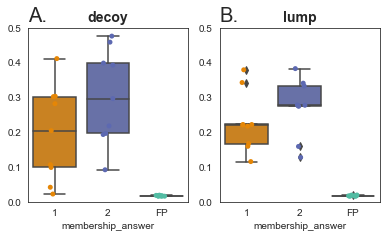

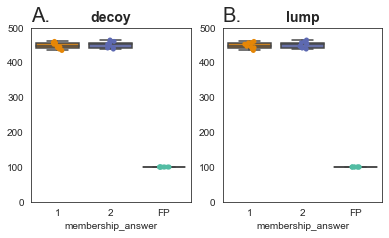

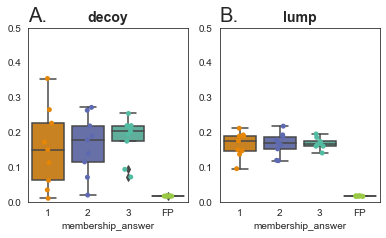

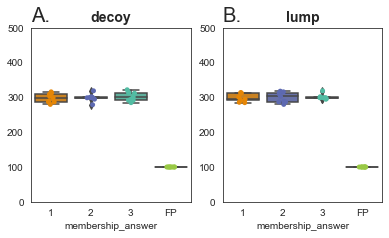

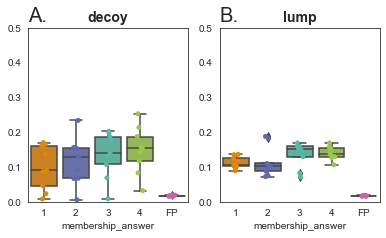

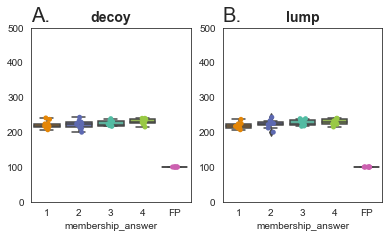

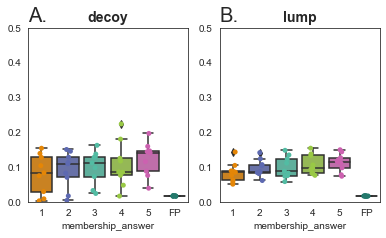

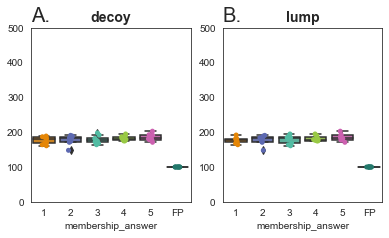

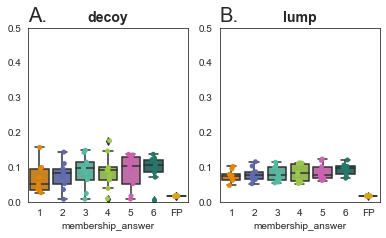

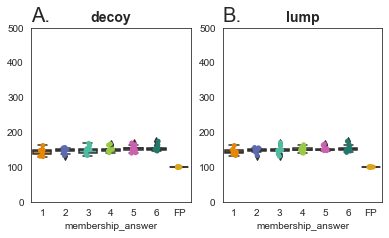

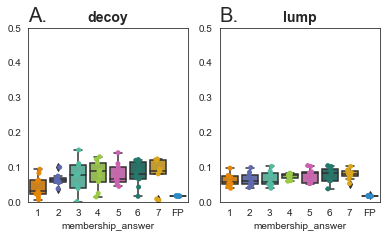

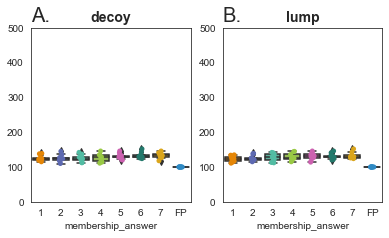

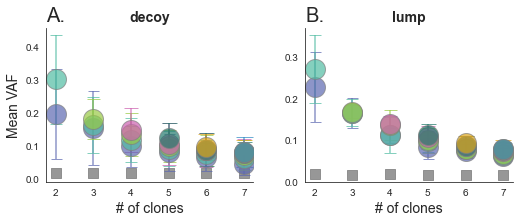

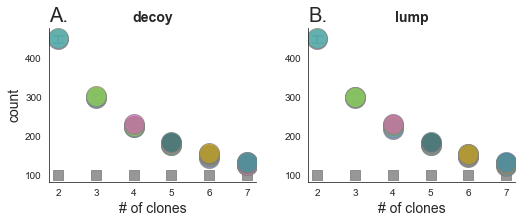

In [13]:
def drawfigure (long_df, ax, ax_no, title, x_order, y):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))


    # Create a grouped bar graph    
    sns.stripplot(data = long_df, x = 'membership_answer', y = y, order = x_order, hue = "membership_answer", hue_order = x_order, legend = False, ax = ax[ax_no])
    sns.boxplot(data = long_df, x = 'membership_answer', y = y, order = x_order, ax = ax[ax_no]  )

    ax[ax_no].set_title (title, fontsize = 14, fontweight = "semibold")


def long_df_modify (long_df, col):
    import numpy as np

    # 제일 큰 건 FP_index
    FP_index = len ( np.array ( long_df.groupby("membership_answer")[ col ].mean() ) )  - 1

    # argsort를 이용해서 변환표 작성
    clone_dict = {}
    new_index = 0
    for prev_index  in np.argsort ( np.array ( long_df.groupby("membership_answer")[ col ].mean() )  )  :
        if prev_index == FP_index:  # FP
            clone_dict [FP_index] = "FP"
        else:
            clone_dict [prev_index] = new_index + 1
            new_index +=1

    # 새로운 membership_answer_new를 만들어줌
    new_col = []
    for k in range (long_df.shape[0]):
        if long_df.loc[k]["membership_answer"] != "FP":
            #print ( long_df.loc[k]["membership_answer"] ) 
            new_col.append ( str ( clone_dict [ int ( long_df.loc[k]["membership_answer"] ) ] ) )
        else:
            new_col.append ( "FP" )
        
    long_df ["membership_answer_new"] = new_col
    long_df ["membership_answer"] = new_col

    return long_df


def makedd (d, col, NUM_CLONE):
    dd = pd.merge ( d.groupby( 'membership_answer_new' )[col].mean().reset_index(), 
                            d.groupby( 'membership_answer_new' )[col].std().reset_index(),
                            left_on = "membership_answer_new", right_on = "membership_answer_new")
    dd.columns = [ "membership_answer_new", "mean", "std" ]
    dd ["NUM_CLONE"] = NUM_CLONE

    return dd

def drawfigure_all  (long_df_all, ax, title):
    import matplotlib 
    matplotlib.rcParams["font.family"] = 'arial'
    import palettable
    import matplotlib.pyplot as plt
    import seaborn as sns
    from scipy.stats import ttest_ind

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    colorlist = { str(index) : value for index, value in enumerate(safe7)}
    colorlist ["FP"] = Gr_10[9]

    for k in range (long_df_all.shape[0]):
        if long_df_all.iloc[k]["membership_answer_new"] != "FP":
            ax.errorbar( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"],
                                yerr = long_df_all.iloc[k]["std"],   capsize = 5 +  int(long_df_all.iloc[k]["membership_answer_new"]) * 0.5, capthick = 20, barsabove = False, elinewidth = 1.5,
                                fmt='o', markersize = 20, markeredgewidth = 1, markeredgecolor = "gray",
                                alpha = 0.7, color = colorlist[ long_df_all.iloc[k]["membership_answer_new"] ]  ) 
        else:  # FP
            ax.scatter ( x = long_df_all.iloc[k]["NUM_CLONE"] , y = long_df_all.iloc[k]["mean"], 
                                marker = 's', s = 100, edgecolor = "gray",
                                alpha = 0.8, c = colorlist[ long_df_all.iloc[k]["membership_answer_new"] ] 
                            )
        
    ax.set_title (title, fontsize = 14, fontweight = "semibold")


########################################### MAIN  ##########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, glob

kwargs = {}

NUM_BLOCK_LIST = [ 1  ]             # 1, 2, 3
NUM_MUTATION_LIST = [ 1000 ]    # 100, 500, 1000
DEPTH_MEAN_LIST = [ 250 ]       # 250, 125, 30
FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
SIMDATA_LIST = [ "decoy", "lump" ] # "decoy", "lump"
NUM_CLONE_LIST = [2, 3, 4, 5, 6, 7]      # 2, 3, 4, 5, 6, 7
BENCHMARK_LIST = [0, 9]

long_df_vaf_all_decoy = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_vaf_all_lump = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_count_all_decoy = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
long_df_count_all_lump = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )

for NUM_CLONE in NUM_CLONE_LIST:
    for FP_RATIO in FP_RATIO_LIST:
        fig1, ax1 = plt.subplots( nrows = 1, ncols = 2, figsize = (6.3, 3.2))
        fig2, ax2 = plt.subplots( nrows = 1, ncols = 2, figsize = (6.3, 3.2))

        for ax_no, SIMDATA in enumerate(SIMDATA_LIST):        
            long_df_vaf = pd.DataFrame ( columns = ["membership_answer", "clone", "meanVAF"] )
            long_df_count = pd.DataFrame ( columns = ["membership_answer", "clone", "count"] )
        
            for NUM_MUTATION in NUM_MUTATION_LIST:
                for NUM_BLOCK in NUM_BLOCK_LIST:
                    for DEPTH_MEAN in DEPTH_MEAN_LIST:
                        # INPUT_TSV_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) +  "/*/npvaf.txt" ) )
                        # for INPUT_TSV in INPUT_TSV_LIST:

                        for BENCHMARK_NO in range (BENCHMARK_LIST[0], BENCHMARK_LIST[1]):
                            INPUT_TSV = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/" + str (SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) +  "/" + str(BENCHMARK_NO) + "/npvaf.txt"
                            if not os.path.exists ( INPUT_TSV ):
                                print (INPUT_TSV + "없음")
                                continue

                            df = pd.read_csv (INPUT_TSV, sep = "\t", index_col = 0)
                            tt = pd.melt ( df.groupby( 'membership_answer' ).mean().reset_index(), id_vars=['membership_answer'], var_name='clone', value_name='meanVAF')
                            uu = pd.melt ( df.groupby( 'membership_answer' ).count().reset_index(), id_vars=['membership_answer'], var_name='clone', value_name='count')

                            long_df_vaf = long_df_vaf.append( tt , ignore_index = True) 
                            long_df_count = long_df_count.append( uu, ignore_index = True) 

            long_df_vaf = long_df_modify (long_df_vaf, "meanVAF")
            long_df_count = long_df_modify (long_df_count, "count")
            
            drawfigure (long_df_vaf, ax1, ax_no, SIMDATA, x_order =  [str(i) for i in np.arange (1, NUM_CLONE + 1)] + ["FP"] , y = "meanVAF")
            drawfigure (long_df_count, ax2, ax_no, SIMDATA,  x_order = [str(i) for i in np.arange (1, NUM_CLONE + 1)] + ["FP"] , y = "count")
            
            if SIMDATA == "decoy":
                long_df_vaf_all_decoy = long_df_vaf_all_decoy.append (  makedd (long_df_vaf, "meanVAF", NUM_CLONE) , ignore_index = True)
                long_df_count_all_decoy = long_df_count_all_decoy.append (  makedd (long_df_count, "count", NUM_CLONE) , ignore_index = True)
            elif SIMDATA == "lump":
                long_df_vaf_all_lump = long_df_vaf_all_lump.append (  makedd (long_df_vaf, "meanVAF", NUM_CLONE) , ignore_index = True)
                long_df_count_all_lump = long_df_count_all_lump.append (  makedd (long_df_count, "count", NUM_CLONE) , ignore_index = True)


        for k, ax1_individual in enumerate(ax1):
            ax1_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
            ax1_individual.set_ylim (0, 0.5)
            ax1_individual.set_ylabel (None)
        fig1.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/meanVAF_clone" + str(NUM_CLONE) + ".jpg" , dpi = 300 )
        fig1.show()
        
        for k, ax2_individual in enumerate(ax2):
            ax2_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
            ax2_individual.set_ylim (0,500)
            ax2_individual.set_ylabel (None)
        fig2.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/count_clone" + str(NUM_CLONE) + ".jpg" , dpi = 300 )
        fig2.show()



#1. VAF proportion

fig_all, ax_all = plt.subplots( nrows = 1, ncols = 2, figsize = (7.2, 3.1))
fig_all.subplots_adjust ( wspace = 0.25, bottom = 0.16, top = 0.85, left = 0.08, right = 0.98)

drawfigure_all ( long_df_vaf_all_decoy, ax_all[0] , "decoy")
drawfigure_all ( long_df_vaf_all_lump, ax_all[1]  , "lump")

for k, ax_individual in enumerate(ax_all):
    ax_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
    ax_individual.spines['top'].set_visible(False)
    ax_individual.spines['right'].set_visible(False)
    ax_individual.set_xlabel ( "# of clones", fontsize = 14)
ax_all[0].set_ylabel ( "Mean VAF", fontsize = 14 )

fig_all.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/meanVAF_all_scatter.jpg" , dpi = 300 )
fig_all.show()


#2. COUNT proportions

fig_all, ax_all = plt.subplots( nrows = 1, ncols = 2, figsize = (7.2, 3.1))
fig_all.subplots_adjust ( wspace = 0.25, bottom = 0.16, top = 0.85, left = 0.08, right = 0.98)

drawfigure_all ( long_df_count_all_decoy, ax_all[0] , "decoy")
drawfigure_all ( long_df_count_all_lump, ax_all[1]  , "lump")

for k, ax_individual in enumerate(ax_all):
    ax_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
    ax_individual.spines['top'].set_visible(False)
    ax_individual.spines['right'].set_visible(False)
    ax_individual.set_xlabel ( "# of clones", fontsize = 14)
ax_all[0].set_ylabel ( "count", fontsize = 14 )

fig_all.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/proportions/1.SimData/count_all_scatter.jpg" , dpi = 300 )
fig_all.show()





In [9]:
long_df_vaf.iloc[0:10, ]

,membership_answer,clone,meanVAF
0,0,block0,0.218146
1,1,block0,0.281991
2,FP,block0,0.017700
3,0,block0,0.092046
4,1,block0,0.411591
5,FP,block0,0.017300
6,0 0,block0,0.414298
7,1 1,block0,0.080684
8,FP F,block0,0.018100
9,0 0,block0,0.044429


### CellData : Proportions of each clone

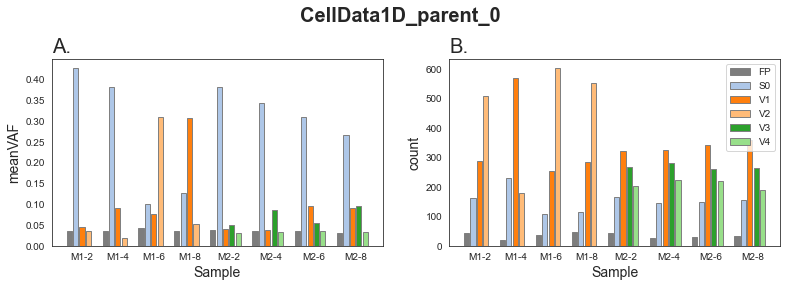

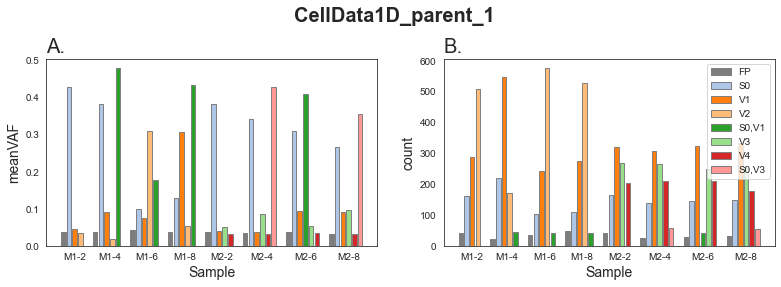

In [128]:
def plt_groupedbarchart (long_df, ax, col = "count", bar_width = 0.2):
    import palettable
    import matplotlib.pyplot as plt

    # Get unique samples and membership answers for x-axis and hue
    samples = long_df['sample'].unique()
    membership_answers = long_df['membership_answer'].unique()

    #
    tabl = palettable.tableau.Tableau_20.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors
    colorlist = {}
    for clone_index, clone in enumerate( membership_answers) :
        colorlist [clone] = tabl[clone_index]
    colorlist ["FP"] = Gr_10[9]

    # Define bar width and spacing

    spacing = 2 * bar_width

    # Calculate x-positions for bars
    x_pos = 0
    x_pos_tick = []

    # Create a bar chart for each membership answer
    for sample_index, sample in enumerate (samples):
        x_pos_first = -1

        for clone_index, clone in enumerate(membership_answers):
            try:
                y_values = long_df[long_df["sample"] == sample].groupby("membership_answer")[ col ].mean()[clone]
                ax.bar(x_pos, y_values, width = bar_width, label = clone, color = colorlist[clone], edgecolor = "gray")
                if x_pos_first == -1:
                    x_pos_first = x_pos
                x_pos += (bar_width) * 1.25
            except:
                continue

        x_pos_tick.append (  (x_pos_first + x_pos) / 2)
        x_pos += spacing

    # Customize the plot
    ax.set_xlabel('Sample')
    ax.set_ylabel( col )
    ax.set_xticks( x_pos_tick, samples)

    # Get legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()

    # Deduplicate the legend data
    unique_labels = []
    unique_handles = []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_labels.append(label)
            unique_handles.append(handle)

    # Create a new legend with deduplicated data
    ax.legend(unique_handles, unique_labels)


########################################### MAIN  ##########################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, glob

kwargs = {}

NUM_BLOCK_LIST = [ 1 ]             # 1, 2, 3
NUM_MUTATION_LIST = [ 1000 ]    # 1000, 500, 100
DEPTH_MEAN_LIST = [ 250 ]       # 250, 125, 30
NUM_PARENT_LIST = [ 0, 1 ]       # 0 , 1
FP_RATIO_LIST = [ 0.1  ]        # 0.0, 0.1
AXIS_RATIO_LIST = [ -1 ]        # -1, 0.0, 0.2



for ax_no, NUM_PARENT in enumerate( NUM_PARENT_LIST ):
    fig, ax = plt.subplots( nrows = 1, ncols = 2, figsize = (11, 4))
    fig.subplots_adjust ( hspace = 0.25, bottom = 0.15, top = 0.8, left = 0.06, right = 0.98)

    long_df_vaf_all = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )
    long_df_count_all = pd.DataFrame ( columns = ["membership_answer_new", "mean", "std", "NUM_CLONE"] )

    for FP_RATIO in FP_RATIO_LIST:
        long_df_vaf = pd.DataFrame ( columns = ["membership_answer", "block", "meanVAF", "sample"] )
        long_df_count = pd.DataFrame ( columns = ["membership_answer", "block", "count", "sample"] )
    
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for NUM_BLOCK in NUM_BLOCK_LIST:
                for DEPTH_MEAN in DEPTH_MEAN_LIST:
                    SAMPLE_DIR_LIST = sorted ( glob.glob ("/data/project/Alzheimer/CLEMENT/02.npvaf/2.CellData/CellData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN) + "x/parent_" + str (NUM_PARENT) + "/fp_" + str(FP_RATIO) + "/axis_-1/*" ) )

                    for SAMPLE_DIR in SAMPLE_DIR_LIST:
                        SAMPLE = SAMPLE_DIR.split("/")[-1]
                        INPUT_TSV_LIST = sorted ( glob.glob ( SAMPLE_DIR + "/*/npvaf.txt" ) )

                        for INPUT_TSV in INPUT_TSV_LIST:
                            if not os.path.exists ( INPUT_TSV ):
                                print (INPUT_TSV + "없음")
                                continue
                            df = pd.read_csv (INPUT_TSV, sep = "\t", index_col = 0)
                            tt = pd.melt ( df.groupby( 'membership_answer' ).mean().reset_index(), id_vars=['membership_answer'], var_name='block', value_name='meanVAF')
                            uu = pd.melt ( df.groupby( 'membership_answer' ).count().reset_index(), id_vars=['membership_answer'], var_name='block', value_name='count')
                            tt ["sample"] = SAMPLE
                            uu["sample"] = SAMPLE

                            long_df_vaf = long_df_vaf.append( tt , ignore_index = True) 
                            long_df_count = long_df_count.append( uu, ignore_index = True) 

    plt_groupedbarchart (long_df_vaf, ax[0], col = "meanVAF", bar_width = 0.2)
    #sns.barplot ( long_df_vaf, x = "sample", y = "meanVAF", hue = "membership_answer",  ax = ax[0])
    ax[0].get_legend().remove()
    #sns.barplot ( long_df_count, x = "sample", y = "count", hue = "membership_answer", ax = ax[1])
    plt_groupedbarchart (long_df_count, ax[1], col = "count", bar_width = 0.2)
    fig.suptitle ("CellData1D_parent_{}".format(NUM_PARENT), fontsize = 20, fontweight = "bold")
            
    for k, ax_individual in enumerate(ax):
        ax_individual.set_title (chr (k+65) + "." , fontsize = 20, loc = "left")    # A. B. C.
        ax_individual.set_xlabel ( ax_individual.get_xlabel(), fontsize = 14 )
        ax_individual.set_ylabel ( ax_individual.get_ylabel(), fontsize = 14 )
    

    fig.savefig ( "/data/project/Alzheimer/YSscript/cle/Revision/2.CellData_proportions/1D_parent_{}.jpg".format(NUM_PARENT) , dpi = 300 )
    fig.show()


---

### CellData : FP densitogram

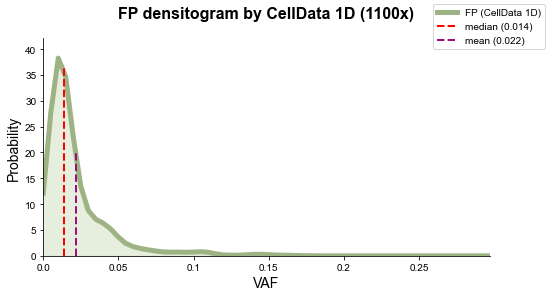

In [2]:
def visualization (vaf_list, **kwargs):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np
    import scipy.stats as kde

    matplotlib.rcParams["font.family"] ="arial"
    fig, ax = plt.subplots (figsize = (8, 4))
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "FP densitogram by CellData 1D ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 16, fontweight='bold', color='black', pad=20)

    x = np.linspace(0, 1, 200)
    kde_function = kde.gaussian_kde( vaf_list )
    y = kde_function(x) 

    ax.plot (x, y, label = "FP (CellData 1D)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)

    # median & mean
    ax.axvline(x = np.median (vaf_list),  ymin = 0, ymax = kde_function ( np.median(vaf_list) ) [0] / plt.ylim()[1]  * 0.97 , label = "median ({})".format ( round ( np.median(vaf_list), 3) ), linestyle='--', linewidth=2, color = 'red' )       
    ax.axvline(x = np.mean (vaf_list),  ymin = 0, ymax = kde_function ( np.mean(vaf_list) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (vaf_list), 3) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

    # 축 설정
    ax.set_xticks (  np.linspace (0, 1.01, 21) )
    ax.set_xticklabels (  np.round ( np.linspace (0, 1.01, 21), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.3, 0, np.max (y) * 1.1] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()


if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 1100}
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_list =  []


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = round (alt / depth, 3) 

            if inputdf.iloc[k]["sample"] == "FP":           # FP만 고른다
                vaf_list.append ( vaf )
            
        #print ( "{} : vaf_list = {}".format (kwargs ["SAMPLENAME"], len(vaf_list) ) )

    visualization ( np.array (vaf_list) , ** kwargs)

### CellData : VAF - FP probability (2023.08.04)

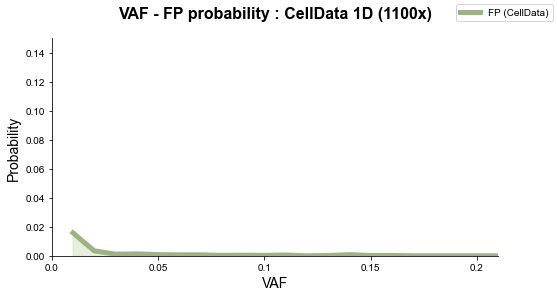

In [3]:
def visualization (vaf_fP_ratio, **kwargs):
    import matplotlib.pyplot as plt

    x = np.arange (0, 101, 1)
    y = np.array ( [ vaf_fp_ratio[i] for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

    ax.set_title ( "VAF - FP probability : CellData 1D ({}x)".format(kwargs["DEPTH_MEAN"]), fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (CellData)", linewidth = 5, color = '#9EB384')
    ax.fill_between(x, y, color='#CEDEBD', alpha=0.5)
    #ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] * 1.03, label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xticks (  np.arange (0, 101, 5) )
    ax.set_xticklabels (  np.round ( np.arange (0, 1.01, 0.05), 2 ) )
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 21, 0, 0.15] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()



if __name__ == "__main__":
    import numpy as np
    import os,re
    import pandas as pd

    kwargs = {"DEPTH_MEAN" : 1100}
    DIR = "/data/project/Alzheimer/CLEMENT/01.INPUT_TSV/2.CellData/CellData_1D/" + str(kwargs["DEPTH_MEAN"]) + "x"

    vaf_cnt =  np.array([ [0, 0] ] * 101 )
    vaf_fp_ratio = [ [] ] * 101


    for filename in sorted(os.listdir (DIR)):
        kwargs["SAMPLENAME"] = re.split(r'[_ .]', filename)[0]
        #print ( kwargs ["SAMPLENAME"])
        if os.path.isdir( DIR + "/" + filename ) == True:
            continue

        inputdf = pd.read_csv ( DIR + "/" + filename, sep = "\t", header = None)

        if inputdf.shape[1] == 3: #  If 4th column (BQ) is absent
            inputdf.columns = ["pos", "sample", "info"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str"})
        elif inputdf.shape[1] == 4: #  If 4th column (BQ) is present
            inputdf.columns = ["pos", "sample", "info", "BQ"]
            inputdf.astype ({"pos":"str", "sample":"str", "info":"str", "BQ":"str"})

        for k in range (inputdf.shape[0]):
            depth = int ( inputdf.iloc[k]["info"].split(",")[0] ) 
            alt = int ( inputdf.iloc[k]["info"].split(",")[1] ) 
            vaf = int ( np.round (alt / depth, 2) * 100 )

            if inputdf.iloc[k]["sample"] == "FP":
                vaf_cnt [vaf][0] = vaf_cnt [vaf][0] + 1
            else:
                vaf_cnt [vaf][1] = vaf_cnt [vaf][1] +  1

    for k in range (len (vaf_cnt)):
        if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) == 0:
            vaf_fp_ratio[k] = np.nan
        else:
            if (vaf_cnt[k][0]  + vaf_cnt[k][1] ) < 200:
                vaf_fp_ratio[k] = np.nan
            else:
                vaf_fp_ratio[k] = vaf_cnt[k][0] / (vaf_cnt[k][0]  + vaf_cnt[k][1] )

    visualization (vaf_fp_ratio, **kwargs)

---

### SimData : VAF - FP probability (2023.08.03)

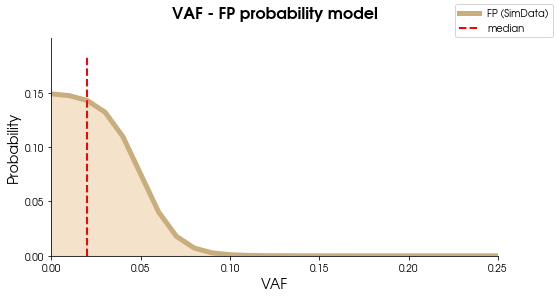

In [3]:
def TN_prior_cal(x):
    from scipy.special import expit
    return (1 - expit( 100*x - 5)) * 0.15

if __name__ == "__main__":
    import numpy as np
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt
    
    x = np.linspace(0, 1, 101)
    y = np.array ( [TN_prior_cal(i) for i in x] )

    fig, ax = plt.subplots (figsize = (8, 4))
    ax.set_yticks ( np.arange (0, np.max(y) * 1.1, 0.05))

    ax.set_title ( "VAF - FP probability model", fontsize = 16, fontweight='bold', color='black', pad=20)

    ax.plot (x, y, label = "FP (SimData)", linewidth = 5, color = '#C8AE7D')
    ax.fill_between(x, y, color='#EAC696', alpha=0.5)
    ax.axvline(x = 0.02,  ymin = 0, ymax = TN_prior_cal (0.02)/plt.ylim()[1] , label = "median", linestyle='--', linewidth=2, color = 'red' )

    # 축 설정
    ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
    ax.set_ylabel("Probability", fontdict = {"fontsize" : 14})
    ax.axis ( [0, 0.25, 0, 0.2] )

    # Spine 설정
    fig.gca().spines['top'].set_visible(False)
    fig.gca().spines['right'].set_visible(False)
    fig.legend()

### SimData : FP densitogram (2023.08.03)


======================	1.SimData_1D/n1000_250x/decoy/0.1	===============================

======================	1.SimData_1D/n1000_250x/lump/0.1	===============================


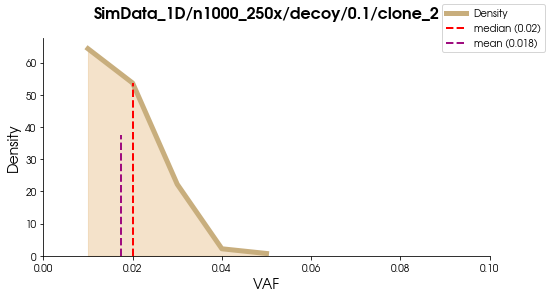

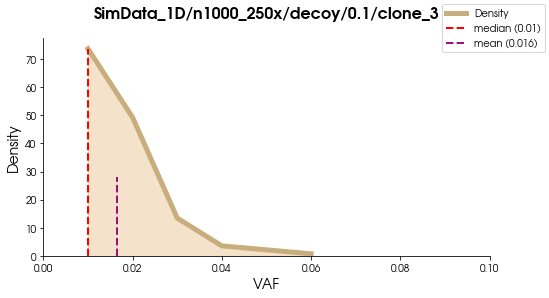

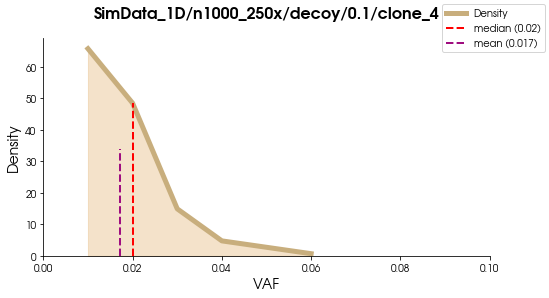

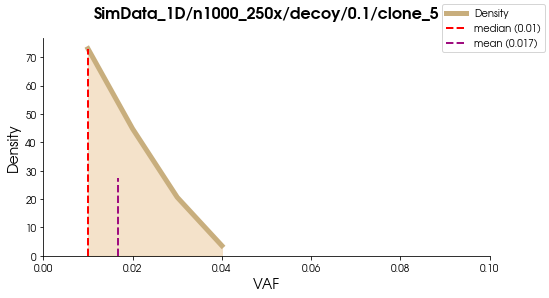

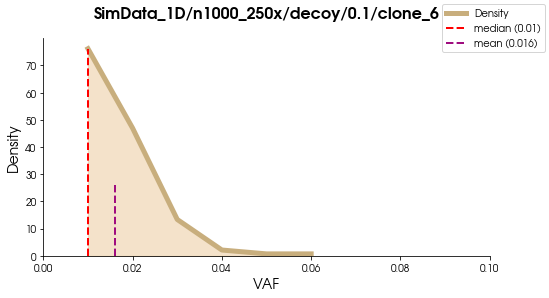

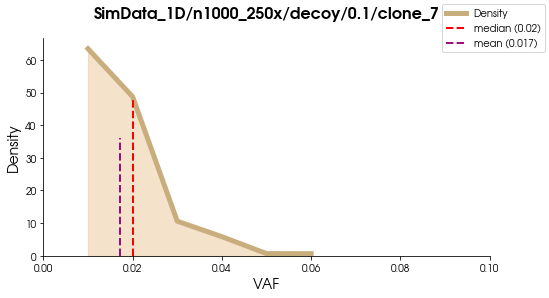

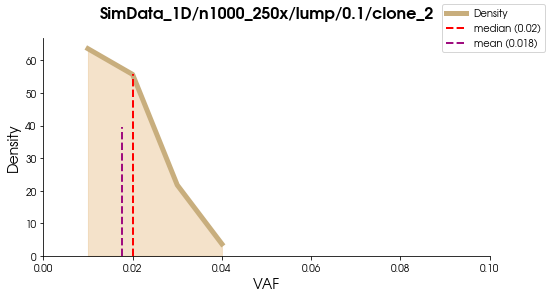

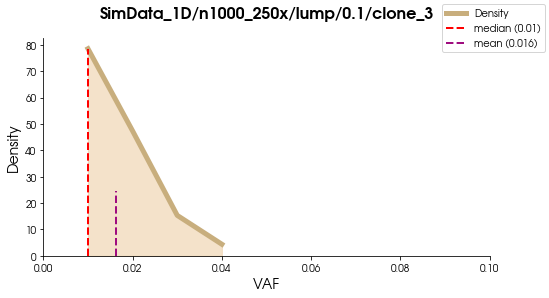

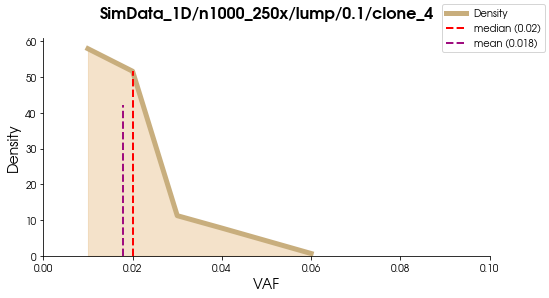

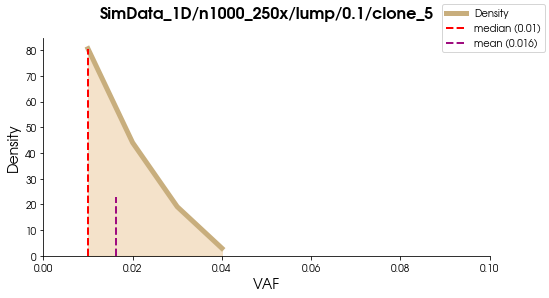

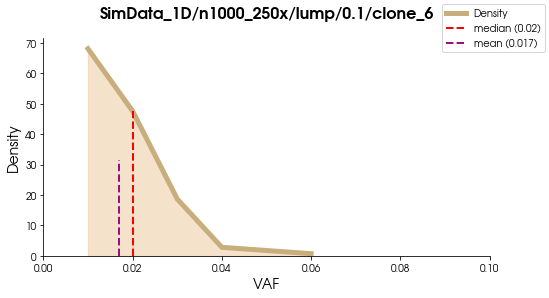

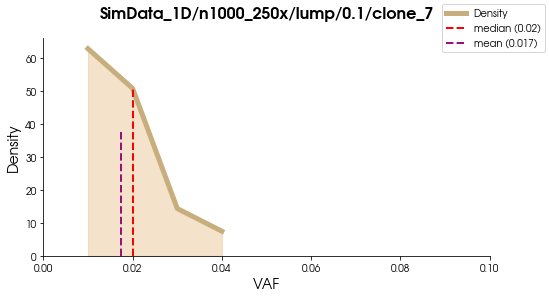

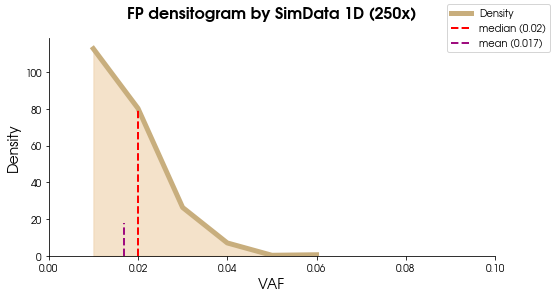

In [3]:
def draw_fp_densitogram (x, TITLE):
    import numpy as np
    from scipy.stats import gaussian_kde
    import matplotlib
    matplotlib.rcParams["font.family"] = "URW Gothic"
    import matplotlib.pyplot as plt

    if len (x) != 0:           # FP = 0 이고 비어있으면 아예 densitogram 안됨
        x = sorted ( np.array (x) )
        kde_function = gaussian_kde( x )
        y = kde_function (x)


        fig, ax = plt.subplots (figsize = (8, 4))
        #ax.set_yticks ( np.arange (0, np.max(y), 0.1))

        ax.set_title ( TITLE, fontsize = 16, fontweight='bold', color='black', pad=20)

        ax.plot (x, y, label = "Density", linewidth = 5, color = '#C8AE7D')
        ax.fill_between(x, y, color = '#EAC696', alpha=0.5)
        ax.axvline(x = np.median (x),  ymin = 0, ymax = kde_function ( np.median(x) ) [0] / plt.ylim()[1] , label = "median ({})".format ( round ( np.median(x), 3) ), linestyle='--', linewidth=2, color = 'red' )       
        ax.axvline(x = np.mean (x),  ymin = 0, ymax = kde_function ( np.mean(x) ) [0] / plt.ylim()[1]  , label = "mean ({})".format (round (np.mean (x), 3) ), linestyle='--', linewidth=2, color = '#9F0D7F' )       

        # 축 설정
        ax.set_xlabel("VAF", fontdict = {"fontsize" : 14})
        ax.set_ylabel("Density", fontdict = {"fontsize" : 14})
        ax.axis ( [0, 0.1, 0, np.max (y) * 1.05] )

        # Spine 설정
        fig.gca().spines['top'].set_visible(False)
        fig.gca().spines['right'].set_visible(False)
        fig.legend()




if __name__ == "__main__":    
    import os
    import pandas as pd

    kwargs = {}

    NUM_BLOCK_LIST = [1]             # 1, 2, 3
    NUM_MUTATION_LIST = [1000]    # 500, 100
    DEPTH_MEAN_LIST = [250]       # 100, 30
    FP_RATIO_LIST = [ 0.1 ]        # 0.0, 0.1
    SIMDATA_LIST = [ "decoy", "lump"] # "decoy", "lump"
    NUM_CLONE_LIST = [ 2, 3, 4, 5, 6, 7 ]      # 2, 3, 4, 5, 6, 7
    BENCHMARK_LIST = [0, 1, 2]; kwargs["BENCHMARK_START"] = BENCHMARK_LIST[0];  kwargs["BENCHMARK_END"] = BENCHMARK_LIST[1]

    x_total = []
    for NUM_BLOCK in NUM_BLOCK_LIST:
        for NUM_MUTATION in NUM_MUTATION_LIST:
            for DEPTH_MEAN in DEPTH_MEAN_LIST:        
                for SIMDATA in SIMDATA_LIST:
                    for FP_RATIO in FP_RATIO_LIST:
                        print("\n======================\t1.SimData_{}D/n{}_{}x/{}/{}\t===============================".format( NUM_BLOCK ,NUM_MUTATION, DEPTH_MEAN, SIMDATA, FP_RATIO ))            
                        for NUM_CLONE in NUM_CLONE_LIST:
                            x_regional = []
                            for ii in range(kwargs["BENCHMARK_START"],  kwargs["BENCHMARK_END"] + 1):
                                kwargs["NPVAF_DIR"] = "/data/project/Alzheimer/CLEMENT/02.npvaf/1.SimData/SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) + "/" +  str(ii) + "/npvaf.txt"
                                npvaf = pd.read_csv (kwargs["NPVAF_DIR"], sep = "\t",  index_col = 0  )
                                npvaf = npvaf [ npvaf["membership_answer"] == "FP"]
                                for i in range (NUM_BLOCK):
                                    x_regional = x_regional +  list ( npvaf.iloc[:, i] ) 
                                    x_total = x_total +  list ( npvaf.iloc[:, i] ) 
                            draw_fp_densitogram (x_regional, TITLE = "SimData_" + str(NUM_BLOCK) + "D/n" + str(NUM_MUTATION) + "_" + str(DEPTH_MEAN)  + "x/" + str(SIMDATA) + "/" + str(FP_RATIO) + "/clone_" + str(NUM_CLONE) )
    
    draw_fp_densitogram (x_total, TITLE = "FP densitogram by SimData {}D ({}x)".format ( NUM_BLOCK_LIST[0], DEPTH_MEAN_LIST[0]) )
                                